In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING DATA, NORMALISING IT AND FORMATTING IT

In [2]:
# Importing the data from CSV files
dataframe_x = pd.read_csv('logisticX.csv', header=None)
dataframe_y = pd.read_csv('logisticY.csv', header=None)

# Converting Dataframe object into Numpy arrays
training_set_x = dataframe_x.to_numpy().T
training_set_y = dataframe_y.to_numpy().T

# Normalising the training data to have 0 mean and unit variance
mean_x, std_x = np.mean(training_set_x, axis=1, keepdims=True), np.std(training_set_x, axis=1, keepdims=True)
training_set_x = (training_set_x - mean_x)/std_x

# Stacking another row to the training data to represent x_0 = 1 feature
x_0 = np.ones(training_set_x.shape[1])
training_set_x = np.vstack((x_0, training_set_x))

IMPLEMENTING NEWTON'S METHOD

In [3]:
# Number of training examples
m = training_set_x.shape[1]

# Returns the sigmoid of 'x'
# Numpy vectorisation allows 'x' to be an array 
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Calculates the value of log-likelihood
def get_log_likelihood(training_set_x, training_set_y, learning_params):
    # In case argument of log is approximated as 0 by Python, we add a small value 'epsilon' to avoid run-time error
    epsilon = 1e-5

    h_theta_x = sigmoid(np.dot(learning_params, training_set_x))
    log_h_theta_x = np.log(h_theta_x)
    log_h_theta_x_comp = np.log(1 - h_theta_x + epsilon)
    
    return ((1)/m) * np.sum((training_set_y * log_h_theta_x) + ((1-training_set_y)*log_h_theta_x_comp))

# Optimizes the log-likelihood using Newton's Method
def newtons_method(training_set_x, training_set_y, allowed_error):
    
    '''
        training_set_x : {3 x m} array to represent input features of training data
        training_set_y : each entry is either 0 or 1 : {1 x m} array to represent output of training data
        learning_rate : hyper - parameter (eta)
        allowed_error : required difference between consecutive values of parameters to stop Newton's Method
    '''
    
    learning_params = np.zeros((1, 3))
    converged = False
    iterations = 0
    
    while not converged:
        iterations += 1

        # Calculating the current value of log-likelihood
        prev_log_likelihood = get_log_likelihood(training_set_x, training_set_y, learning_params)

        # Updating the theta parameters using Newton's Method update rule
        h_theta_x = sigmoid(np.dot(learning_params, training_set_x))
        gradient = (1/m) * np.sum(training_set_x * (training_set_y - h_theta_x), axis=1)
        # Calculating the Hessian Matrix
        hessian_matrix = np.zeros((3, 3))
        temporary_array = h_theta_x * (1 - h_theta_x)
        for i in range(3):
            for j in range(3):
                hessian_matrix[i][j] = ((-1)/m) * np.sum(training_set_x[i]*training_set_x[j]*temporary_array)         
        hessian_matrix_inverse = np.linalg.inv(hessian_matrix)
        change = np.matmul(hessian_matrix_inverse, gradient.T).T
        learning_params -= change
        
        # New log-likelihood after updating the theta parameters
        new_log_likelihood = get_log_likelihood(training_set_x, training_set_y, learning_params)
        
        # Checking for convergence
        if (abs(new_log_likelihood - prev_log_likelihood) <= allowed_error):
            converged = True

    return (learning_params, iterations)

FUNCTIONS FOR VARIOUS PLOTS

In [4]:
# Make a scatter plot of training set
def plt_input_data(training_set_x, training_set_y, plot_axes):
    for i in range(training_set_y.shape[1]):
        if (training_set_y[0][i] == 1):
            plot_axes.scatter(training_set_x[1][i], training_set_x[2][i], marker='x', c='r')
        else:
            plot_axes.scatter(training_set_x[1][i], training_set_x[2][i], marker='o', c='b')

# Plots a straight line showing the boundary separating the region where h(x)>0.5 from where h(x)<=0.5
def plt_separator(learning_params, plot_axes):
    t_0, t_1, t_2 = learning_params[0][0], learning_params[0][1], learning_params[0][2]
    x1 = np.linspace(-2, 3, 100)
    x2 = (-1/t_2) * ((t_1*x1 + t_0))
    plot_axes.plot(x1, x2, c='g')

TRAINING THE MODEL

In [5]:
'''
Training the model
    allowed error = 1e-6
'''
allowed_error = 0
theta_params, iterations = newtons_method(training_set_x, training_set_y, allowed_error)

SCATTER PLOT

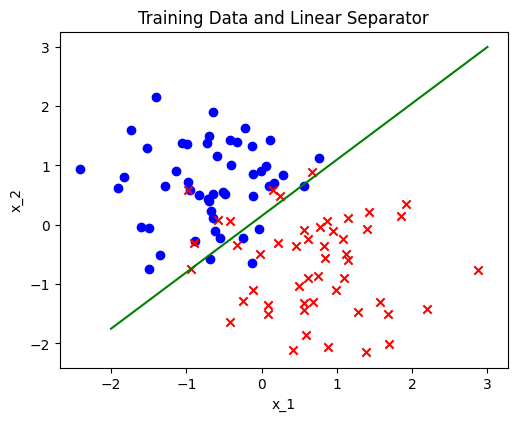

In [7]:
# Figure for Scatter Plot and Hypothesis Function
scatter_plt = plt.figure()
scatter_plt_axes = scatter_plt.add_axes([0.2, 0.2, 0.7, 0.7])
scatter_plt_axes.set_xlabel('x_1')
scatter_plt_axes.set_ylabel('x_2')
scatter_plt_axes.set_title('Training Data and Linear Separator')

# Plots the graphs
plt_input_data(training_set_x, training_set_y, scatter_plt_axes)
plt_separator(theta_params, scatter_plt_axes)